In [16]:
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('dump.csv')

Analyse data


In [18]:
print(df.columns.values)
print(df.info())
df.describe()

['id' 'datetime' 'meterid' 'vry' 'vyb' 'vbr' 'vrn' 'vyn' 'vbn' 'ir' 'iy'
 'ib' 'pf' 'hz' 'kwh' 'kvah' 'kvarhlag' 'kvarhlead' 'kw' 'kw-r' 'kw-y'
 'kw-b' 'kva' 'kva-r' 'kva-y' 'kva-b' 'kvar' 'kvar-r' 'kvar-y' 'kvar-b']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32283 entries, 0 to 32282
Data columns (total 30 columns):
id           32283 non-null int64
datetime     32283 non-null object
meterid      32283 non-null int64
vry          32283 non-null float64
vyb          32283 non-null float64
vbr          32283 non-null float64
vrn          32283 non-null float64
vyn          32283 non-null float64
vbn          32283 non-null float64
ir           32283 non-null float64
iy           32283 non-null float64
ib           32283 non-null float64
pf           32283 non-null float64
hz           32283 non-null float64
kwh          32283 non-null int64
kvah         32283 non-null int64
kvarhlag     32283 non-null int64
kvarhlead    32283 non-null int64
kw           32283 non-null float64
kw-

,id,meterid,vry,vyb,vbr,vrn,vyn,vbn,ir,iy,...,kw-y,kw-b,kva,kva-r,kva-y,kva-b,kvar,kvar-r,kvar-y,kvar-b
count,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,...,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000,32283.000000
mean,22835.167178,1.000279,415.288829,412.945869,419.011493,242.673427,238.192915,239.264062,459.815486,452.294291,...,106763.641481,99680.991341,319452.890022,111668.292665,107491.519960,100307.527865,-9983.369399,-4860.453803,-3919.568992,612.620234
std,9354.739468,0.050091,7.388690,5.917049,7.360651,5.770064,3.263947,3.530732,167.552507,167.445411,...,39413.156959,38908.021404,118608.074284,41188.928621,39450.028184,38974.100668,33977.539240,10897.043022,12051.550787,11435.121127
min,6610.000000,1.000000,384.670000,384.600000,388.930000,223.260000,220.850000,223.160000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-107110.300000,-41599.080000,-39314.030000,-31543.030000
25%,14791.500000,1.000000,411.450000,409.950000,414.810000,238.220000,236.180000,237.480000,340.315000,327.100000,...,77156.070000,70713.740000,232400.000000,82308.370000,77791.100000,71332.845000,-29551.800000,-9642.880000,-11542.510000,-7381.570000
50%,22862.000000,1.000000,416.760000,413.730000,420.510000,244.620000,238.350000,239.770000,449.550000,440.040000,...,104279.200000,97515.960000,312084.300000,109324.100000,104968.500000,98093.430000,-21122.320000,-7158.080000,-7930.440000,-3612.500000
75%,30932.500000,1.000000,420.370000,416.690000,424.100000,246.920000,240.230000,241.510000,576.940000,570.360000,...,134949.700000,126157.700000,402932.150000,140789.650000,135727.450000,126672.050000,15513.180000,-3937.730000,5097.870000,7724.500000
max,39003.000000,10.000000,445.940000,439.840000,450.320000,262.000000,254.040000,255.370000,1093.020000,1024.250000,...,237140.200000,231341.100000,720048.300000,265564.900000,239536.400000,232494.700000,237886.100000,82178.850000,74869.460000,82585.200000


<h2>Edit data features</h2>

FORMAT DATE

In [19]:
req_df = df[['id','datetime','kwh']].copy()
# req_df.info()
date_col, time_col = req_df['datetime'].str.split(' ').str
# len(date_time[0])
del req_df['datetime']
# date_col = date_time[0]
# time_col = (date_time[1] + date_time[2])

req_df['date'] = date_col.str.replace('-','/')
# req_df.head(25)
# req_df['month'] = req_df['date'].str.split('/').str[0].astype(str).astype(int)
# req_df['day'] = req_df['date'].str.split('/').str[1].astype(str).astype(int)
# del req_df['date']
# req_df['date'] = (req_df['date'].str.split('/').str[1].astype(str) + req_df['date'].str.split('/').str[2].astype(str)).astype(int)
req_df['date'] = (req_df['date'].str.split('/').str[0].astype(int).astype(str) + '/' + req_df['date'].str.split('/').str[2].astype(str))

In [20]:
t = req_df.loc[req_df['date'] == '4/2016']


FORMAT TIME

In [21]:
print(len(time_col))
time = []
cnt=0
# print(time_col[3822])
for i in time_col:
    cnt+=1
    i = str(i)
    if(len(i)>5):
        hr, mn, s = i.split(':')
        if(s[len(s)-2]=='P' and hr!='12'):
            hr = str(int(hr) + 12)
        elif(s[len(s)-2]=='A' and hr=='12'):
            hr = '0'
        time.append(hr+'.'+mn)
    else:
        time.append(str(i))
# print(time[3822])
req_df['time'] = time
req_df['hour'] = req_df['time'].str.split('.').str[0].astype(str).astype(int)
req_df['minute'] = req_df['time'].str.split('.').str[1].astype(str).astype(int)
del req_df['time']
# print(type(time_col[16].split(':')[0]))

32283


View data format

In [22]:
req_df.info()
req_df.head()
# req_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32283 entries, 0 to 32282
Data columns (total 5 columns):
id        32283 non-null int64
kwh       32283 non-null int64
date      32283 non-null object
hour      32283 non-null int64
minute    32283 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


,id,kwh,date,hour,minute
0,6610,619472,5/2015,17,37
1,6611,619539,5/2015,17,51
2,6612,619602,5/2015,18,5
3,6613,619662,5/2015,18,19
4,6614,619723,5/2015,18,33


SPLIT DAY IN SLOTS

In [23]:
def foo(a):
    if(a>=8 and a<=12):
        return 1
    elif(a<=16):
        return 2
    elif(a<=20):
        return 3
    
q = []
for i in req_df['hour']:
    q.append(foo(i))

req_df['day_quarter'] = q



In [24]:
req_df.info()
req_df[req_df['date']=='9/2016']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32283 entries, 0 to 32282
Data columns (total 6 columns):
id             32283 non-null int64
kwh            32283 non-null int64
date           32283 non-null object
hour           32283 non-null int64
minute         32283 non-null int64
day_quarter    29117 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ MB


,id,kwh,date,hour,minute,day_quarter
26146,32867,579846,9/2016,15,45,2.0
26147,32868,579895,9/2016,15,59,2.0
26148,32869,579945,9/2016,16,13,2.0
26149,32870,579990,9/2016,16,27,2.0
26150,32871,580035,9/2016,16,41,2.0
26151,32872,580081,9/2016,16,56,2.0
26152,32873,580128,9/2016,17,10,3.0
26153,32874,580176,9/2016,17,24,3.0
26154,32875,580220,9/2016,17,38,3.0
26155,32876,580264,9/2016,17,52,3.0


In [25]:
# plt.scatter(req_df['date'],req_df['day_quarter'])
# req_df.plot.bar(x='date',rot=0, title='Population', figsize=(15,10), fontsize=12)


<h2>PLOT</h2>



In [26]:
xlab = req_df.date.unique()
tmp_df = pd.DataFrame(columns=('date', 'kwh')).copy()
# req_df.loc[req_df['date'] == xlab[0]]

In [27]:
c2 = 0
for i in xlab:
    j_df = req_df.loc[req_df['date'] == i]
    tmp_df.loc[c2] = (i,(j_df['kwh'].iloc[len(j_df)-1] - j_df['kwh'].iloc[0]))
    if(i=='3/2016'):
        tmp_df.loc[c2] = (i,104407)
    if(i=='11/2015'):
        tmp_df.loc[c2] = (i,252418)
    if(i=='8/2015'):
        tmp_df.loc[c2] = (i,245604)
    c2 += 1

tmp_df.drop(tmp_df.index[len(tmp_df)-1], inplace = True)
tmp_df.drop(tmp_df.index[0], inplace = True)

# tmp_df.info()
print(tmp_df.head(25))


       date       kwh
1    6/2015  151970.0
2    7/2015  196977.0
3    8/2015  245604.0
4    9/2015  272915.0
5   10/2015  299352.0
6   11/2015  252418.0
7   12/2015  182637.0
8    1/2016  225089.0
9    2/2016  493768.0
10   3/2016  104407.0
11   4/2016  130993.0
12   5/2016   76801.0
13   6/2016    1812.0
14   7/2016   54133.0
15   8/2016   54675.0
16   9/2016   49948.0
17  10/2016   39401.0
18  11/2016   54655.0
19  12/2016   71443.0
20   1/2017   77320.0


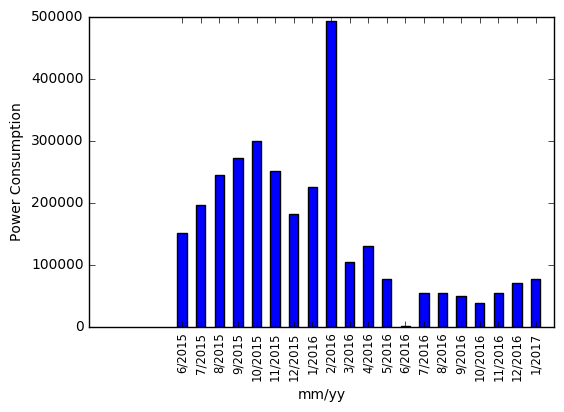

In [28]:
t1 = tmp_df['date'].tolist()
t2 = tmp_df['kwh'].tolist()

# plt.axes.Axes.set_xlable('mm/yy')
# plt.set_ylabel('Average Power consumption')
plt.bar(range(len(t1)), t2, align='center', width=.5, color='blue')
plt.xticks(range(len(t1)), t1, size='small',rotation='vertical')
plt.xlabel("mm/yy")
plt.ylabel("Power Consumption")
plt.show()

UPDATE kwmp values


In [29]:
up_df = pd.DataFrame(columns=('date', 'day_quarter', 'kwh'))
kwh_df = req_df['kwh'].copy()

up_df.loc[0] = req_df.loc[0].copy()
# up_df
for i in range(1,len(req_df)):
#     print(i)
    new_value = kwh_df.loc[i]
    if(new_value < up_df.loc[i-1]['kwh']):
        new_value = new_value + up_df.loc[i-1]['kwh']
    up_df.loc[i] = (req_df['date'].iloc[i], req_df['day_quarter'].iloc[i], new_value)
    
up_df.head(15)

,date,day_quarter,kwh
0,5/2015,3.0,619472.0
1,5/2015,3.0,619539.0
2,5/2015,3.0,619602.0
3,5/2015,3.0,619662.0
4,5/2015,3.0,619723.0
5,5/2015,3.0,619788.0
6,5/2015,3.0,619851.0
7,5/2015,3.0,619915.0
8,5/2015,3.0,619980.0
9,5/2015,3.0,620044.0


In [33]:
up_df.to_csv("updated.csv")

Test

In [30]:
print(up_df.loc[4159]['kwh'])
print(up_df.loc[4160]['kwh'])
print(up_df.loc[4161]['kwh'])
print(kwh_df.loc[4161])



986839.0
986919.0
987129.0
210


Prepare data

In [31]:
c2 = 0
for i in xlab:
    j_df = req_df.loc[req_df['date'] == i]
    tmp_df.loc[c2] = (i,(j_df['kwh'].iloc[len(j_df)-1] - j_df['kwh'].iloc[0]))
    if(i=='3/2016'):
        tmp_df.loc[c2] = (i,104407)
    if(i=='11/2015'):
        tmp_df.loc[c2] = (i,252418)
    if(i=='8/2015'):
        tmp_df.loc[c2] = (i,245604)
    c2 += 1

tmp_df.drop(tmp_df.index[len(tmp_df)-1], inplace = True)
tmp_df.drop(tmp_df.index[0], inplace = True)

# tmp_df.info()
print(tmp_df.head(25))


       date       kwh
2    7/2015  196977.0
3    8/2015  245604.0
4    9/2015  272915.0
5   10/2015  299352.0
6   11/2015  252418.0
7   12/2015  182637.0
8    1/2016  225089.0
9    2/2016  493768.0
10   3/2016  104407.0
11   4/2016  130993.0
12   5/2016   76801.0
13   6/2016    1812.0
14   7/2016   54133.0
15   8/2016   54675.0
16   9/2016   49948.0
17  10/2016   39401.0
18  11/2016   54655.0
19  12/2016   71443.0
20   1/2017   77320.0
0    5/2015     975.0


POWER CONSUMPTION PER MONTH


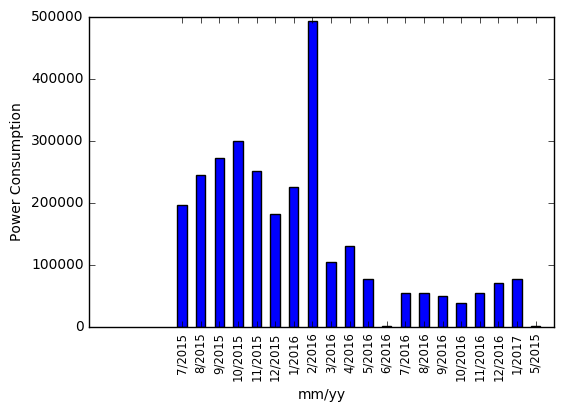

In [34]:
t1 = tmp_df['date'].tolist()
t2 = tmp_df['kwh'].tolist()

# plt.axes.Axes.set_xlable('mm/yy')
# plt.set_ylabel('Average Power consumption')
plt.bar(range(len(t1)), t2, align='center', width=.5, color='blue')
plt.xticks(range(len(t1)), t1, size='small',rotation='vertical')
plt.xlabel("mm/yy")
plt.ylabel("Power Consumption")
plt.show()

Prepare data

In [34]:
new_df = pd.DataFrame(columns=('date', 'day_quarter', 'kwh'))
counter = 0
for i in xlab:
    j_df = up_df.loc[req_df['date'] == i]
    for k in range(1,5):
        tdf = j_df.loc[j_df['day_quarter']==k]
        if(len(tdf)>0):
            new_df.loc[counter] = (i,k,tdf['kwh'].iloc[len(tdf)-1] - tdf['kwh'].iloc[0])
        counter += 1
    
# new_df.drop(tmp_df.index[len(tmp_df)-1], inplace = True)
# new_df.drop(tmp_df.index[0], inplace = True)

# print(new_df.head(25))
new_df

,date,day_quarter,kwh
2,5/2015,3.0,8.710000e+02
4,6/2015,1.0,1.487290e+05
5,6/2015,2.0,1.486420e+05
6,6/2015,3.0,1.481420e+05
8,7/2015,1.0,1.922450e+05
9,7/2015,2.0,1.930540e+05
10,7/2015,3.0,1.927680e+05
12,8/2015,1.0,2.521002e+08
13,8/2015,2.0,2.559141e+08
14,8/2015,3.0,2.597541e+08


PLOT 

       date  day_quarter           kwh
5    6/2015          2.0  1.486420e+05
9    7/2015          2.0  1.930540e+05
13   8/2015          2.0  2.559141e+08
17   9/2015          2.0  7.138942e+08
21  10/2015          2.0  1.931531e+09
25  11/2015          2.0  2.168788e+09
29  12/2015          2.0  4.182008e+08
33   1/2016          2.0  1.067948e+09
37   2/2016          2.0  9.937357e+08
41   3/2016          2.0  5.241891e+08
45   4/2016          2.0  1.603836e+08
49   5/2016          2.0  4.370237e+07
53   6/2016          2.0  2.710451e+06
57   7/2016          2.0  3.034532e+08
61   8/2016          2.0  5.358638e+08
65   9/2016          2.0  4.887200e+08
69  10/2016          2.0  5.191490e+08
73  11/2016          2.0  7.274693e+08
77  12/2016          2.0  1.271255e+09
81   1/2017          2.0  1.427557e+09
85   2/2017          2.0  4.866552e+07


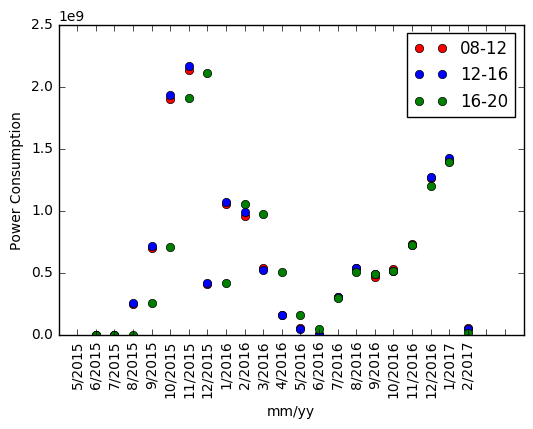

In [52]:
data = pd.DataFrame(new_df)
#end of dataset generation
import matplotlib.dates as mdates
fig, ax = plt.subplots()

# for temp in range(1,5):

slot = ['08-12','12-16','16-20']
for i, color in enumerate(['red', 'blue', 'green'], start=1):
    dat = data[data['day_quarter']==i]
    t1 = dat['date'].tolist()
    t2 = dat['kwh'].tolist()
    x = [j for j in range(2,len(t1)+2)]
    plt.plot(x,t2,'o',color = color, label = slot[i-1])
    
print(data[data['day_quarter']==2])
u_date = up_df.date.unique()
x = [i for i in range(1,25)]
plt.xticks(x, u_date, rotation='vertical')
plt.xlabel("mm/yy")
plt.ylabel("Power Consumption")
plt.legend()

plt.show()
# print(len(data))

Test

In [301]:
req_df[req_df['date']=='3/2016']

,id,kwh,date,hour,minute,day_quarter
21508,28229,959206,3/2016,8,14,2
21509,28230,959247,3/2016,8,28,2
21510,28231,959291,3/2016,8,42,2
21511,28232,959337,3/2016,8,56,2
21512,28233,959386,3/2016,9,10,2
21513,28234,959443,3/2016,9,24,2
21514,28235,959507,3/2016,9,38,2
21515,28236,959576,3/2016,9,52,2
21516,28237,959650,3/2016,10,7,2
21517,28238,959724,3/2016,10,21,2
